In [1]:
import jieba  
import pandas as pd
table=pd.read_csv("data.csv")

In [2]:
table['分词']=""
# #全模式
# for index,row in table.iterrows():
#     row['分词'] = jieba.lcut(row['答案'],cut_all=True)

# #精确模式  
# data = jieba.cut(text,cut_all=False)
# print(u"[精确模式]: ", "/".join(data))

# #默认是精确模式 
# data = jieba.cut(text)  
# print(u"[默认模式]: ", "/".join(data))

# #搜索引擎模式 
# data = jieba.cut_for_search(text)    
# print(u"[搜索引擎模式]: ", "/".join(data))

# #返回列表
# seg_list = jieba.lcut(text, cut_all=False)
# print("[返回列表]: {0}".format(seg_list))

In [3]:
# 创建停用词列表
def stopwordslist(filepath='.\stopwords-master\stopwords\stop_words_zh.txt'):
    stopwords = [line.strip() for line in open(filepath,encoding='UTF-8').readlines()]
    return stopwords

STOPWORDS=stopwordslist('.\stopwords-master\stopwords\CNstopwords.txt')
STOPWORDS=STOPWORDS+['"','-','=', ' ', '/', '.','减少','数据','上涨','中','10','说','年','高','里','房','增长','涨','买','10','月','data','https', 'com', 'zhimg', 'v2','jpg','src','hd','\u200b','size','img','rawwidth']

In [4]:
import jieba.posseg as pseg
import re # 正则表达式库
import collections # 词频统计库
import numpy as np # numpy数据处理库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库

def cut_word(text):
    #词性标注
    words = pseg.cut(text)
    result=pd.DataFrame(columns=['词语','词性'])
    wrds=[]
    pos=[]
    for wrd, flag in words:
        if wrd not in STOPWORDS:
            wrds.append(wrd)
            pos.append(flag)
    result['词语']=wrds
    result['词性']=pos
    return result

result=pd.DataFrame(columns=['词语','词性'])
for i in table['答案']:  
    string=re.findall('\<(.*?)\/\>', i)
    for k in string:
        i=i.replace(k,'')
    result=result.append(cut_word(i))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\MLOONG\AppData\Local\Temp\jieba.cache
Loading model cost 0.555 seconds.
Prefix dict has been built successfully.


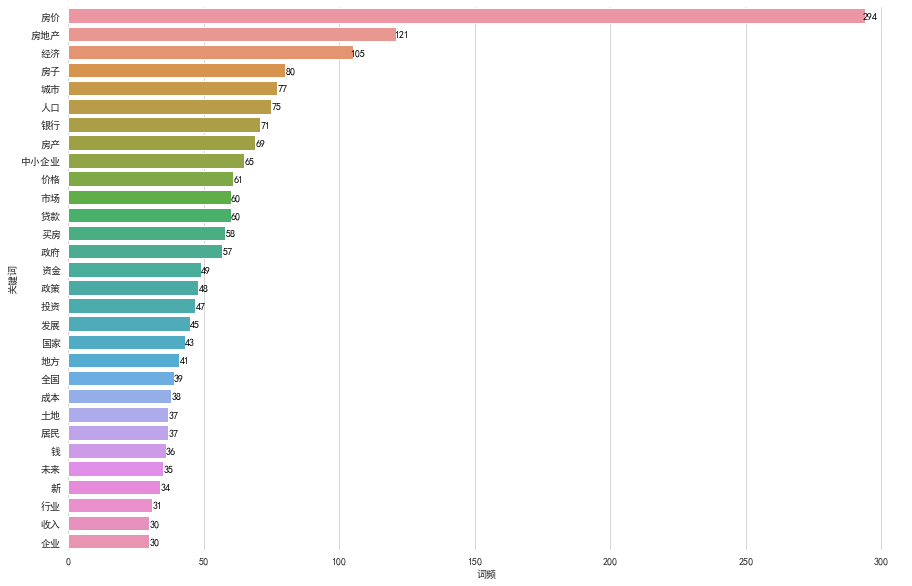

In [9]:
import seaborn as sns
# Top 30 keywords
word_counts = collections.Counter(result['词语']) 
word_counts_top10 = word_counts.most_common(30)
count=pd.DataFrame(columns=['word','count'])
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
for word,number in word_counts_top10:
    count=count.append({'word':word,'count':number},ignore_index=True)
g = sns.barplot(x="count",y="word",data=count)
#在柱状图的上面显示各个类别的数量
for index,row in count.iterrows():
    #在柱状图上绘制该类别的数量
    g.text(float(row['count'])+2,index+0.2,str(row['count']),color="black",ha="center")
sns.despine(left=True, bottom=True)
plt.xlabel("词频")
plt.ylabel("关键词")
plt.savefig('a.jpg')

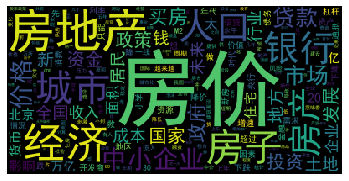

In [11]:
# 词频展示
# mask = np.array(Image.open('wordcloud.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
#     mask=mask, # 设置背景图
    max_words=200, # 最多显示词数
    max_font_size=100 # 字体最大值
)

wc.generate_from_frequencies(word_counts) # 从字典生成词云
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig('b.svg')
plt.show() # 显示图像